#### 10 Academy: Artificial Intelligence Mastery
#### prediction of store sales
#### Rossmann Pharmaceuticals
###### Ethel Cherotaw 

In [1]:
import sys
import pandas as pd 
# Add the scripts and src directories to the Python path
src_dir = r'E:\DS+ML\AIM3\Week4\Week4.AIM3\src'
script_dir=r'E:\DS+ML\AIM3\Week4\Week4.AIM3\scripts'
file_path = r'E:\DS+ML\AIM3\Week4\Data\\'
if src_dir not in sys.path:
    sys.path.append(src_dir)
if src_dir not in sys.path:
    sys.path.append(script_dir)

Trial 5 Complete [00h 00m 55s]
val_loss: 0.09917249530553818

Best val_loss So Far: 0.04889908557136854
Total elapsed time: 00h 07m 10s


2025-01-10 15:29:34,972 - INFO - Best Hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x000001ACC3309A60>
2025-01-10 15:29:34,973 - INFO - Training the final LSTM model.


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1957 - val_loss: 0.1496
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1552 - val_loss: 0.1205
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1164 - val_loss: 0.0739
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1042 - val_loss: 0.0692
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0900 - val_loss: 0.0988
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1030 - val_loss: 0.0691
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0787 - val_loss: 0.0732
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0766 - val_loss: 0.1021
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0953 - val_loss: 0.0672
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0700 - val_loss: 0.0666
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0753 - val_loss: 0.0761
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0

2025-01-10 15:29:56,935 - INFO - LSTM model saved as lstm_model_store_1.pkl
2025-01-10 15:29:56,939 - INFO - Scaler saved as scaler_store_1.pkl


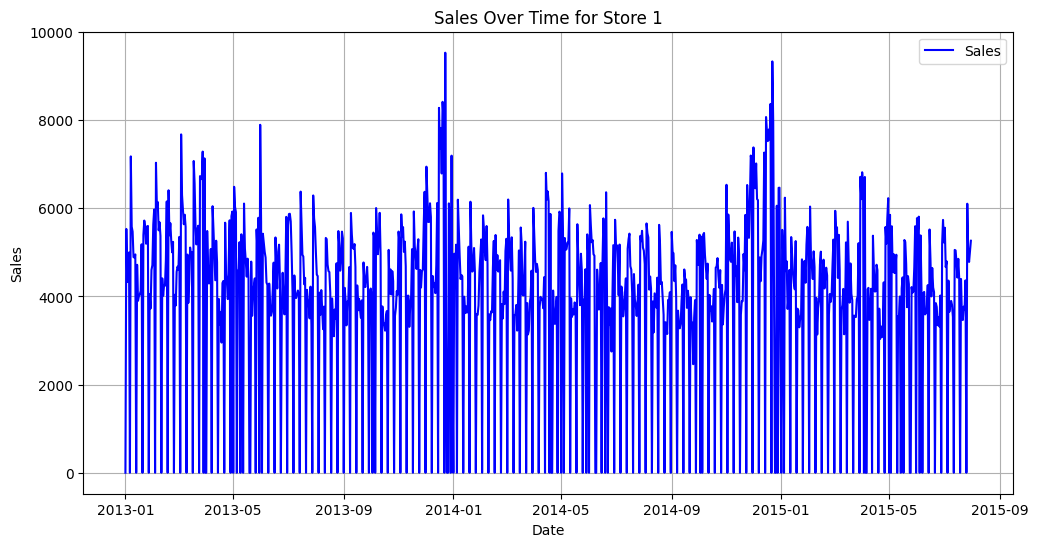

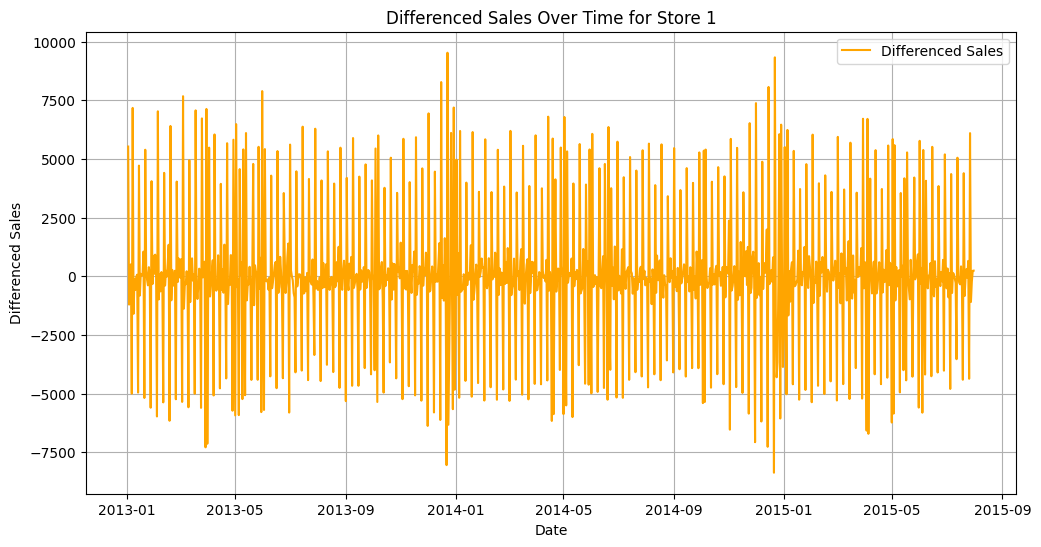

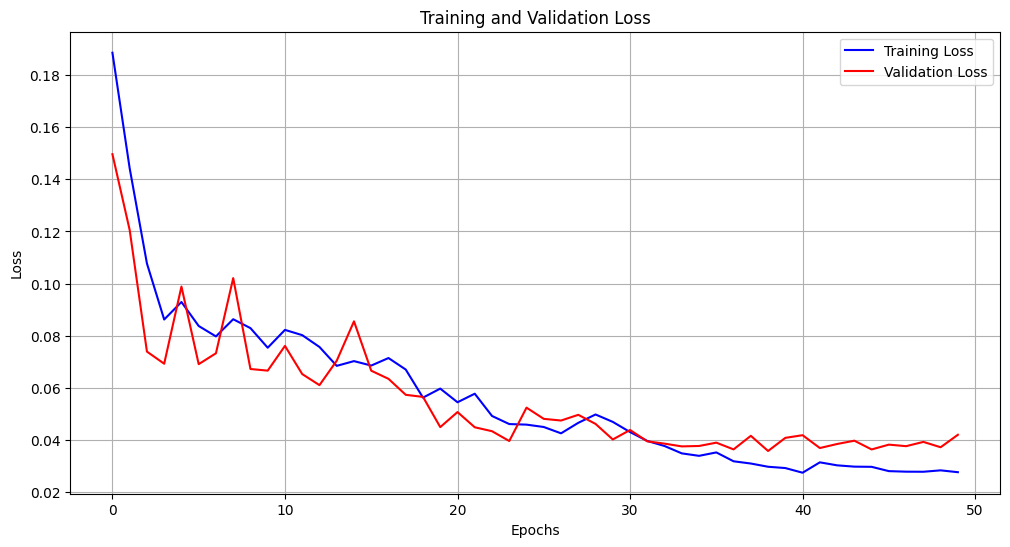

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


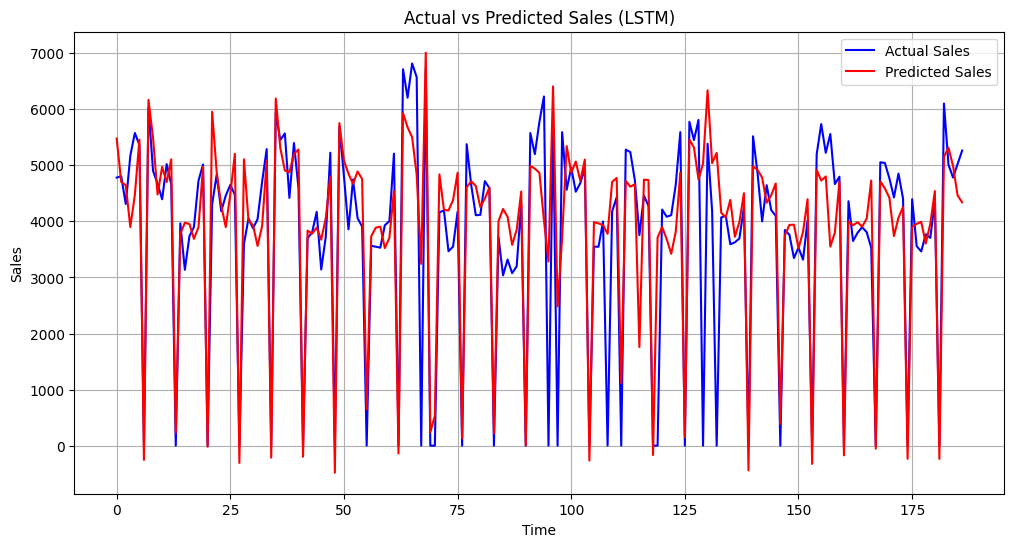

2025-01-10 15:30:01,160 - INFO - Creating sliding window sequences.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━

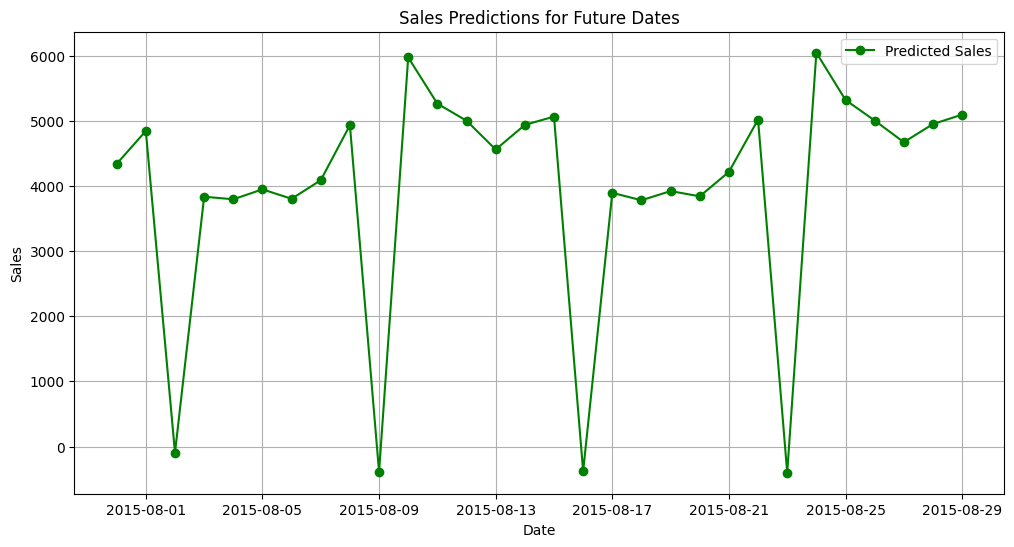

In [2]:
# Import necessary modules
from data_loader import load_data, preprocess_data
from model import train_random_forest, train_lstm, create_sliding_window  # Import create_sliding_window
from utils import (
    plot_sales_over_time, 
    plot_differenced_sales, 
    plot_training_validation_loss, 
    plot_predictions, 
    plot_future_predictions
)
import pandas as pd
import numpy as np

# Load and preprocess data
train_path = r'E:\DS+ML\AIM3\Week4\Data\train.csv'
test_path = r'E:\DS+ML\AIM3\Week4\Data\test.csv'
store_path = r'E:\DS+ML\AIM3\Week4\Data\store.csv'
train_df, test_df, store_df = load_data(train_path, test_path, store_path)
train_df, test_df, scaler = preprocess_data(train_df, test_df, store_df)

# Train RandomForestRegressor
rf_pipeline = train_random_forest(train_df)

# Train LSTM
lstm_model, lstm_scaler, window_size, X_val, y_val, history = train_lstm(train_df)

# Make predictions
store_id = 1
store_data = train_df[train_df['Store'] == store_id][['Date', 'Sales']]
store_data = store_data.sort_values('Date')

# Plot 1: Sales Over Time
plot_sales_over_time(store_data)

# Plot 2: Differenced Sales Over Time
store_data['SalesDiff'] = store_data['Sales'].diff().dropna()
plot_differenced_sales(store_data)

# Plot 3: Training and Validation Loss
plot_training_validation_loss(history)

# Plot 4: Predictions vs. Actual Values
y_pred = lstm_model.predict(X_val)
y_pred_inv = lstm_scaler.inverse_transform(y_pred)
y_val_inv = lstm_scaler.inverse_transform(y_val)
plot_predictions(y_val_inv, y_pred_inv)
# Plot 5: Future Predictions

future_dates = pd.date_range(start=store_data['Date'].max(), periods=30, freq='D')  # Predict for the next 30 days

# Ensure there are enough data points for the sliding window
if len(store_data) >= window_size + 1:  # Need at least window_size + 1 rows
    # Use the last window_size + 1 rows for future_scaled_sales
    future_scaled_sales = lstm_scaler.transform(store_data[['Sales']].tail(window_size + 1))
    
    # Create sliding window data for future predictions
    future_X, _ = create_sliding_window(future_scaled_sales, window_size)
    
    if len(future_X) > 0:  # Check if future_X is not empty
        # Reshape future_X for LSTM input
        future_X = future_X.reshape(future_X.shape[0], future_X.shape[1], 1)
        
        # Make predictions for the next 30 days
        future_predictions = []
        current_sequence = future_X[-1]  # Start with the last sequence
        
        for _ in range(len(future_dates)):
            # Predict the next value
            next_prediction = lstm_model.predict(current_sequence.reshape(1, window_size, 1))
            future_predictions.append(next_prediction[0, 0])
            
            # Update the sequence with the new prediction
            current_sequence = np.roll(current_sequence, -1)
            current_sequence[-1] = next_prediction
        
        # Inverse transform the predictions
        future_predictions = np.array(future_predictions).reshape(-1, 1)
        future_predictions_inv = lstm_scaler.inverse_transform(future_predictions)
        
        # Plot future predictions
        plot_future_predictions(future_dates, future_predictions_inv)
    else:
        print("Not enough data points to create future predictions.")
else:
    print(f"Not enough data points for sliding window. Required: {window_size + 1}, Available: {len(store_data)}")